In [30]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [18]:
root_dir = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), 'project-files', 'radar_data', '2021_10_20_data_new_gestures')
print(root_dir)

c:\Users\Philip\Documents\GitHub\smart-touchless-control-radar\project-files\radar_data\2021_10_20_data_new_gestures


Frame center = 33


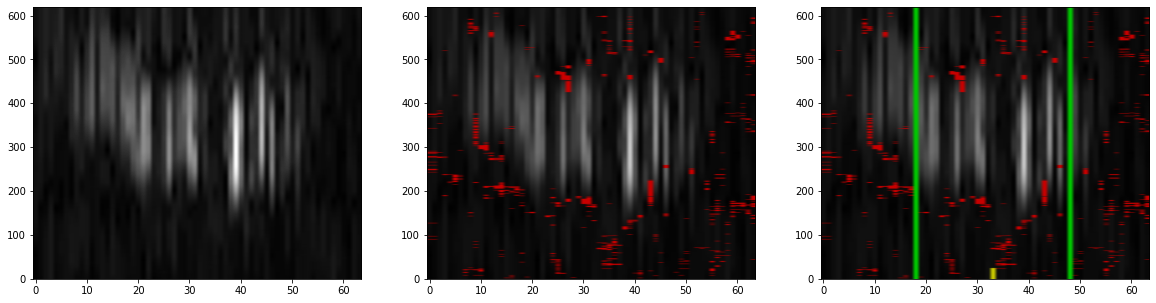

In [164]:
sample = {'index': 200, 'class': 'waving'}

sample_path = os.path.join(root_dir, f"gesture_{sample['class']}", f"{sample['class']}-{str(sample['index']).zfill(3)}.npz")
radar_data = np.load(sample_path)['sample']
radar_mag = np.abs(radar_data).T
radar_mag = np.round(radar_mag / np.max(radar_mag) * 200, decimals=0).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(radar_mag, aspect='auto', origin='lower', cmap='gray');

# ---

dst = cv2.cornerHarris(radar_mag, 2, 3, 0.01)

mag_with_corners = np.repeat(np.expand_dims(radar_mag, axis=-1), 3, axis=-1)
mag_with_corners[dst>0.001*dst.max()] = [200, 0, 0]

ax[1].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

# ---

x_coords = np.where(dst>0.001*dst.max())[1]
# print(x_coords[:20], x_coords[-20:])

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

x_center = np.round(reject_outliers(x_coords).mean(), decimals=0).astype(int)
print(f'Frame center = {x_center}')

mag_with_corners[:25, x_center, :] = [200, 200, 0]
mag_with_corners[:, x_center-15, :] = [0, 200, 0]
mag_with_corners[:, x_center+15, :] = [0, 200, 0]
ax[2].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

Frame center = 32


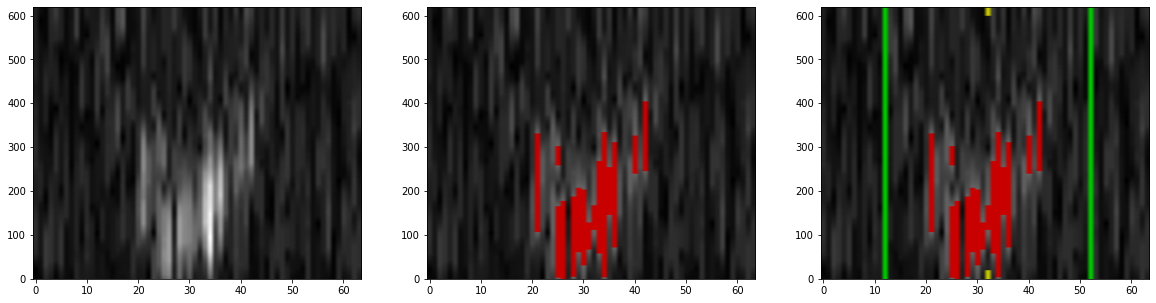

In [194]:
sample = {'index': 150, 'class': 'push'}

sample_path = os.path.join(root_dir, f"gesture_{sample['class']}", f"{sample['class']}-{str(sample['index']).zfill(3)}.npz")
radar_data = np.load(sample_path)['sample']
radar_mag = np.abs(radar_data).T
radar_mag = np.round(radar_mag / np.max(radar_mag) * 255, decimals=0).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(radar_mag, aspect='auto', origin='lower', cmap='gray');

# ---

mag_with_corners = np.repeat(np.expand_dims(radar_mag, axis=-1), 3, axis=-1)
mag_with_corners[radar_mag>100] = [200, 0, 0]

ax[1].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

# ---

x_coords = np.unique(np.where(radar_mag>100)[1])
# print(x_coords[:20], x_coords[-20:])

x_center = np.round(np.mean(x_coords), decimals=0).astype(int)
print(f'Frame center = {x_center}')
x_center = np.clip(x_center, 20, 44)

mag_with_corners[:20, x_center, :] = [200, 200, 0]
mag_with_corners[-20:, x_center, :] = [200, 200, 0]
mag_with_corners[:, x_center-20, :] = [0, 200, 0]
mag_with_corners[:, x_center+20, :] = [0, 200, 0]
ax[2].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

[]
Frame center = 39


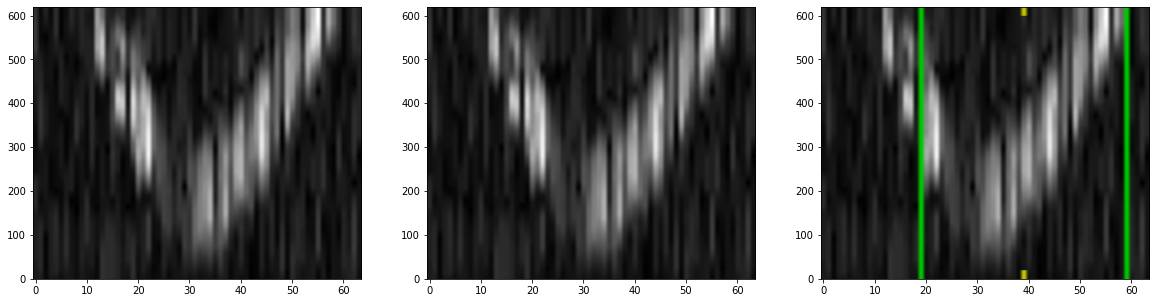

In [190]:
sample = {'index': 200, 'class': 'waving'}

sample_path = os.path.join(root_dir, f"gesture_{sample['class']}", f"{sample['class']}-{str(sample['index']).zfill(3)}.npz")
radar_data = np.load(sample_path)['sample']
radar_mag = np.abs(radar_data).T
radar_mag = np.round(radar_mag / np.max(radar_mag) * 255, decimals=0).astype(np.uint8)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(radar_mag, aspect='auto', origin='lower', cmap='gray');

# ---

peaks = peak_local_max(radar_mag, min_distance=2, threshold_abs=1000)
print(peaks)

mag_with_corners = np.repeat(np.expand_dims(radar_mag, axis=-1), 3, axis=-1)
mag_with_corners[peaks] = [200, 0, 0]

ax[1].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

# ---

x_coords = np.where(radar_mag>150)[1]
# print(x_coords[:20], x_coords[-20:])

x_center = np.round(np.median(x_coords), decimals=0).astype(int)
print(f'Frame center = {x_center}')

mag_with_corners[:20, x_center, :] = [200, 200, 0]
mag_with_corners[-20:, x_center, :] = [200, 200, 0]
mag_with_corners[:, x_center-15, :] = [0, 200, 0]
mag_with_corners[:, x_center+15, :] = [0, 200, 0]
ax[2].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');

Frame center = 32


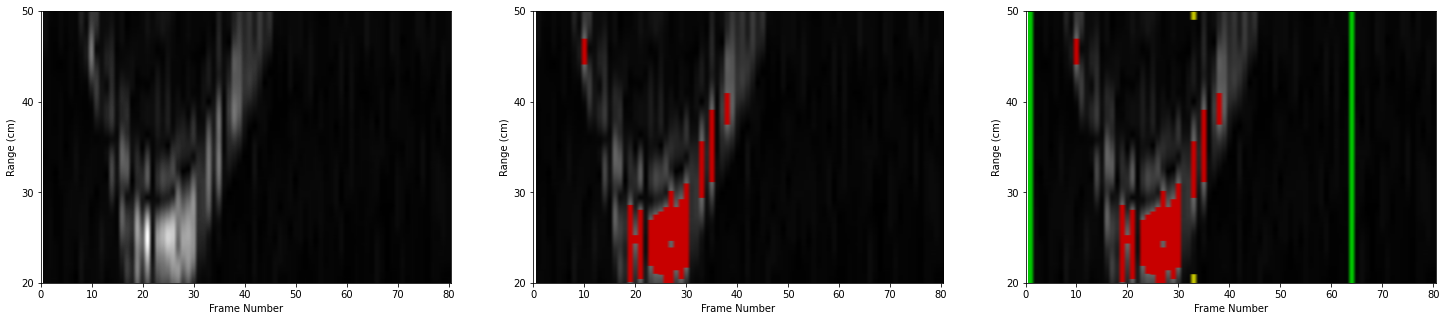

In [37]:
## centering showcase

filepath = 'showcase-000.npz'
radar_data = np.load(filepath)['sample']
radar_mag = np.abs(radar_data).T
radar_mag = np.round(radar_mag / np.max(radar_mag) * 255, decimals=0).astype(np.uint8)

xticks = np.linspace(-1, 79, 9).astype(int)
xtickslabels = xticks + 1
yticks = np.linspace(0, radar_mag.shape[0], 4).astype(int)
ytickslabels = [20, 30, 40, 50]

fig, ax = plt.subplots(1, 3, figsize=(25, 5))
ax[0].imshow(radar_mag, aspect='auto', origin='lower', cmap='gray');
ax[0].set_xticks(xticks);
ax[0].set_xticklabels(xtickslabels);
ax[0].set_xlabel('Frame Number');
ax[0].set_yticks(yticks);
ax[0].set_yticklabels(ytickslabels);
ax[0].set_ylabel('Range (cm)');

# ---

mag_with_corners = np.repeat(np.expand_dims(radar_mag, axis=-1), 3, axis=-1)
mag_with_corners[radar_mag>100] = [200, 0, 0]

ax[1].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');
ax[1].set_xticks(xticks);
ax[1].set_xticklabels(xtickslabels);
ax[1].set_xlabel('Frame Number');
ax[1].set_yticks(yticks);
ax[1].set_yticklabels(ytickslabels);
ax[1].set_ylabel('Range (cm)');

# ---

x_coords = np.unique(np.where(radar_mag>100)[1])
x_center = np.round(np.mean(x_coords), decimals=0).astype(int)
x_center = np.clip(x_center, 32, 48)
print(f'Frame center = {x_center}')

mag_with_corners[:, x_center-32, :] = [0, 200, 0]
mag_with_corners[:, x_center+31, :] = [0, 200, 0]
mag_with_corners[:20, x_center, :] = [200, 200, 0]
mag_with_corners[-20:, x_center, :] = [200, 200, 0]
ax[2].imshow(mag_with_corners, aspect='auto', origin='lower', cmap='gray');
ax[2].set_xticks(xticks);
ax[2].set_xticklabels(xtickslabels);
ax[2].set_xlabel('Frame Number');
ax[2].set_yticks(yticks);
ax[2].set_yticklabels(ytickslabels);
ax[2].set_ylabel('Range (cm)');

# ---

plt.savefig(f'centering_showcase_{filepath[-7:-4]}.png')

In [38]:
images = [2, 3, 4, 5, 6]
combined_image = np.concatenate([cv2.imread(f'centering_showcase_{str(i).zfill(3)}.png')[25:-5, 180:-160, :] for i in images], axis=0)
cv2.imwrite('combined.png', combined_image)

True